In [2]:
#Import necessary libraies
import numpy as np # Numeric calculation
import pandas as pd #Analysing data and reading CSV files
import matplotlib.pyplot as plt #For visualising data
%matplotlib inline

from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('./country_data.csv')

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
df.shape

(167, 10)

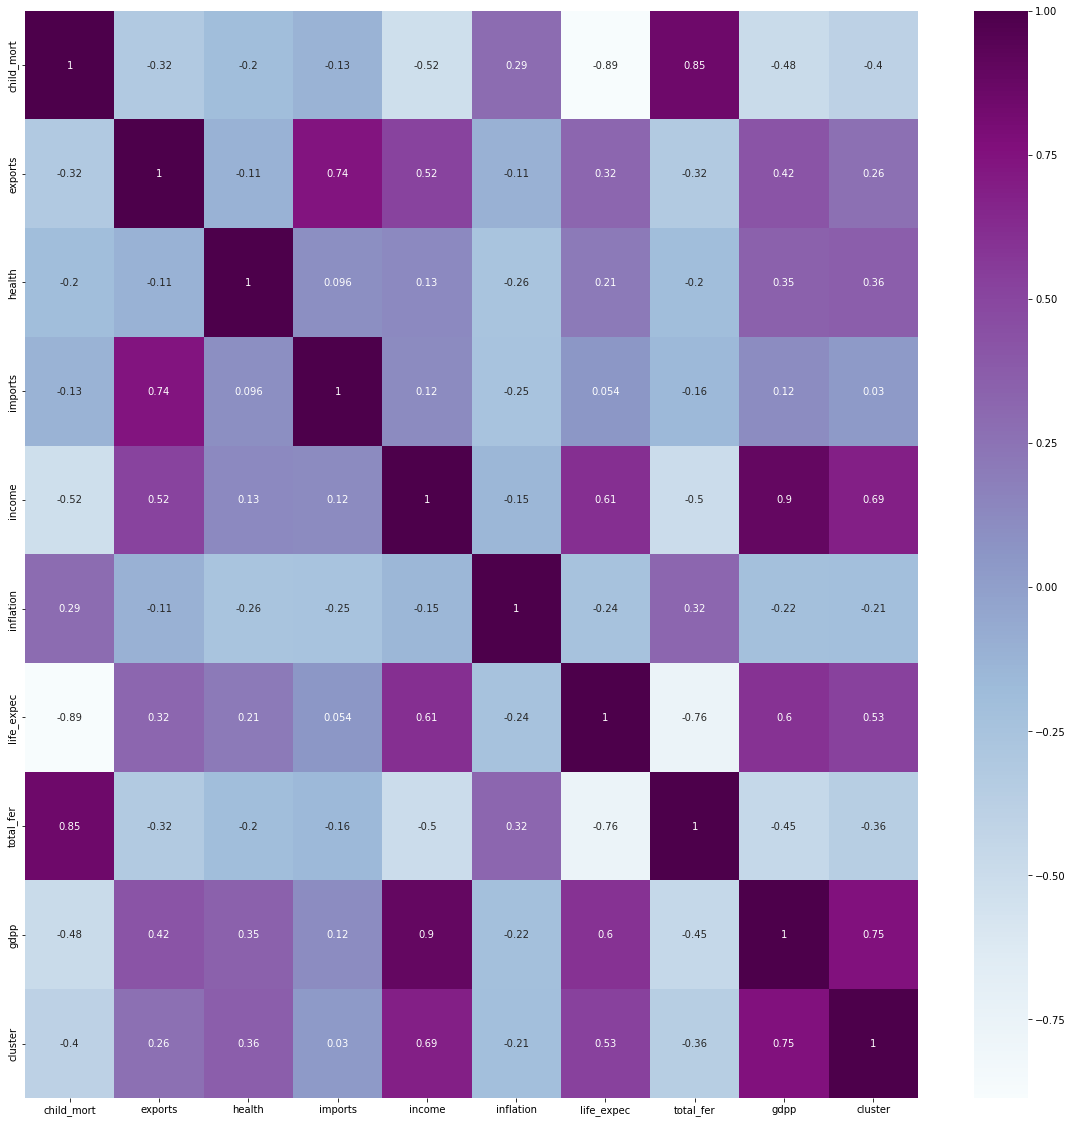

In [147]:
#Visualising the correlation between pairs of columns in the dataset
import seaborn as sns
fig_z = plt.figure(figsize = (20,20))
sns.heatmap(data = df.corr(), annot = True, cmap = 'BuPu')
plt.show
fig_z.savefig('clust.png')

In [43]:
#Drop the column with categorical datatype
dc = df.drop("country", axis=1)

In [44]:
dc.head ()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [45]:
#Clustering the data using 'gdpp' and 'income' (highest correlation)
X = dc.iloc[:, [4,8]].values
print (X[0:5, :])

[[ 1610   553]
 [ 9930  4090]
 [12900  4460]
 [ 5900  3530]
 [19100 12200]]


In [46]:
#normalise the data using standardscaler
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform (X)

Text(0, 0.5, 'GDP')

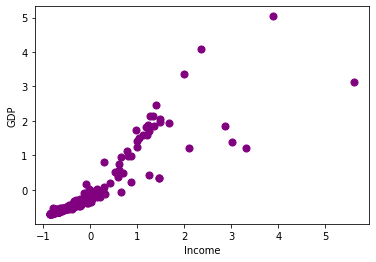

In [47]:
#First scatter plot
plt.scatter (X_scaled[:,0], X_scaled[:,1], c='purple', s = 50)
plt.xlabel('Income')
plt.ylabel('GDP')

Text(0, 0.5, 'WCSS')

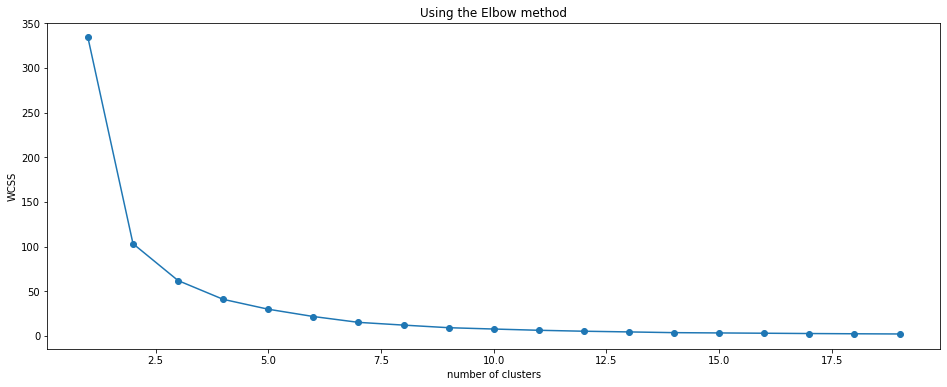

In [48]:
#Use the Elbow method to determine the number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []
 
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                             "cluster_errors": cluster_errors } )
 
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

plt.title('Using the Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

#wcss refers to Within Cluster Sum 

The number of clusters appear to be between 3 and 4 clusters.

In [49]:
#input 3 as the number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X_scaled)

print(y_kmeans)

[0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2
 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0]


Centroids: [[-0.44616698 -0.46655815]
 [ 3.28810126  2.87180862]
 [ 1.06539578  1.23802444]]


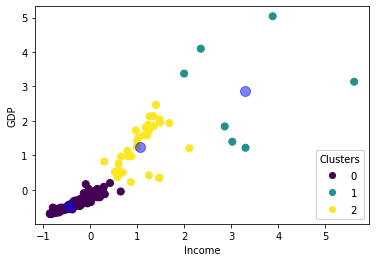

In [50]:
#visualise the clusters
fig, ax1 = plt.subplots()
scatter1 = ax1.scatter(X_scaled[:,0], X_scaled[:,1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
print ('Centroids:', centers)

ax1.scatter(centers[:,0], centers[:,1], c = 'blue', s = 100, alpha = 0.5);

ax1.set_xlabel('Income')
ax1.set_ylabel('GDP')

#make legend different colour from the scatter
legend1 = ax1.legend(*scatter1.legend_elements(), 
                    loc="lower right", title="Clusters")
ax1.add_artist(legend1)
plt.show()

In [52]:
#predict cluster data point
sample_test = np.array([[1610,553]])

ax1.scatter(sample_test[0,0], sample_test[0,1], c = 'purple', marker = '*',
           s = 100, label = 'test data point');

ax1.legend(loc='lower left')

print('test data point belongs to cluster{}'.format(kmeans.predict(sample_test)[0]))

#save plot to a .png file
fig.savefig('kmeans1.png')

test data point belongs to cluster1


## Using three features

In [96]:
dc.head ()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [81]:
#using child_mortlity, health, life_expectancy
X = dc.iloc[:, [0,2,6]].values
print (X[0:5,:])

[[ 90.2    7.58  56.2 ]
 [ 16.6    6.55  76.3 ]
 [ 27.3    4.17  76.5 ]
 [119.     2.85  60.1 ]
 [ 10.3    6.03  76.8 ]]


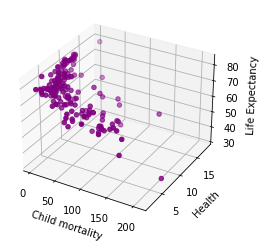

In [102]:
#3D plot of 3 features
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection ='3d')
ax1.scatter(X[:,0], X[:,1], X[:,2], color = 'purple')
ax1.set_xlabel('Child mortality')
ax1.set_ylabel('Health')
ax1.set_zlabel('Life Expectancy')

fig1.tight_layout
plt.show()

Text(0, 0.5, 'WCSS')

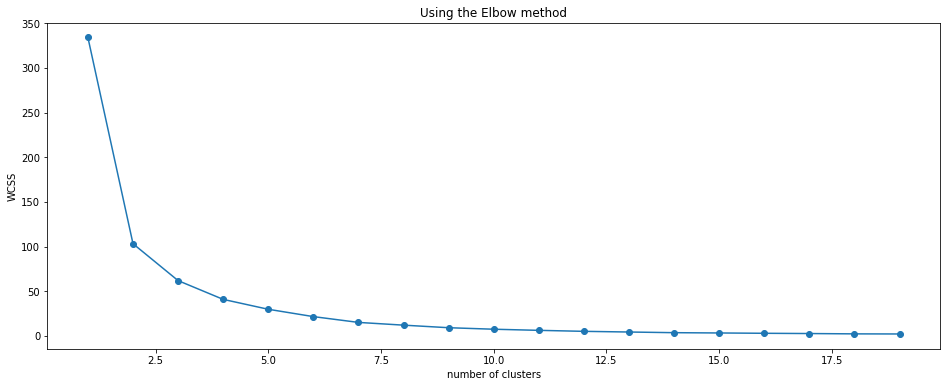

In [83]:
#Use the Elbow method to determine the number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []
 
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                             "cluster_errors": cluster_errors } )
 
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

plt.title('Using the Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

#wcss refers to Within Cluster Sum of Squares

The number of clusters appear to be between 2 and 3 clusters.

In [90]:
#input 3 as the number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[1 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 1 0 1 0 0 0 2 1 1 2 0 0 2 2 0 0 0 1
 2 1 0 2 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 1 0 0 1 0 0 0 2 2 0 2 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 2 1 0 0 0 0 1 1 0 0 2 0 1 0 0 0 0 0 0 2 1 1 1 0
 0 2 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1]


Centroids: [[ 14.20625      7.20875     75.43928571]
 [ 68.30540541   5.96918919  63.17027027]
 [126.26111111   6.11        55.35      ]]


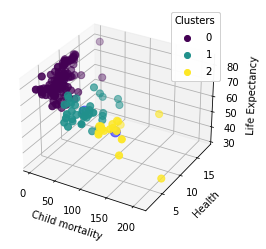

In [95]:
#visualise the 3 features
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection ='3d')
scatter2 = ax2.scatter(X[:,0], X[:,1], X[:,2], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_

print('Centroids:', centers)

ax2.scatter(centers[:,0], centers[:,1], centers[:,2], c = 'blue', s = 100, alpha = 0.5);

ax2.set_xlabel('Child mortality')
ax2.set_ylabel('Health')
ax2.set_zlabel('Life Expectancy')

#make legend different colour from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(), 
                    loc="upper right", title="Clusters")
ax2.add_artist(legend2)

plt.show()

In [101]:
#predict cluster data point
sample_test = np.array([[90.2,7.58,56.2]])

ax2.scatter(sample_test[0,0], sample_test[0,1], sample_test[0,2], c = 'purple', marker = '*',
           s = 100, label = 'test data point');

ax2.legend(loc='lower left')

print('test data point belongs to cluster{}'.format(kmeans.predict(sample_test)[0]))

#save plot to a .png file
fig.savefig('kmeans2.png')

test data point belongs to cluster1


## Using all features except country

In [103]:
dc.head ()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [104]:
#using child_mortlity, health, life_expectancy
X = dc.iloc[:].values
print (X[0:5,:])

[[9.02e+01 1.00e+01 7.58e+00 4.49e+01 1.61e+03 9.44e+00 5.62e+01 5.82e+00
  5.53e+02]
 [1.66e+01 2.80e+01 6.55e+00 4.86e+01 9.93e+03 4.49e+00 7.63e+01 1.65e+00
  4.09e+03]
 [2.73e+01 3.84e+01 4.17e+00 3.14e+01 1.29e+04 1.61e+01 7.65e+01 2.89e+00
  4.46e+03]
 [1.19e+02 6.23e+01 2.85e+00 4.29e+01 5.90e+03 2.24e+01 6.01e+01 6.16e+00
  3.53e+03]
 [1.03e+01 4.55e+01 6.03e+00 5.89e+01 1.91e+04 1.44e+00 7.68e+01 2.13e+00
  1.22e+04]]


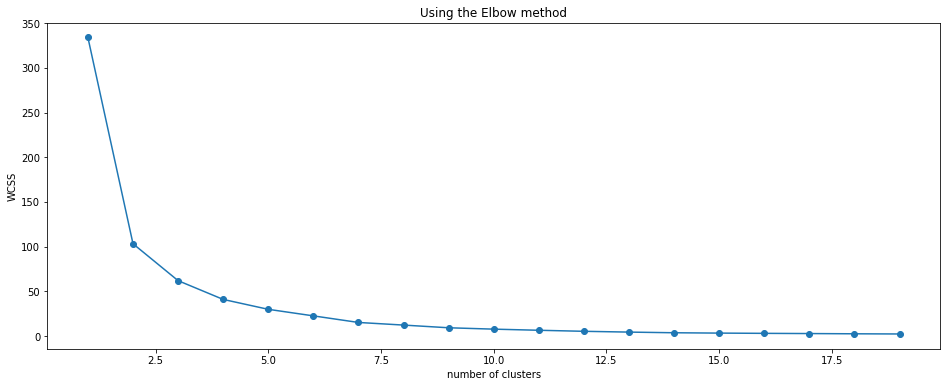

In [105]:
#Use the Elbow method to determine the number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []
 
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )
 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                             "cluster_errors": cluster_errors } )
 
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

plt.title('Using the Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

#wcss refers to Within Cluster Sum of Squares

The number of clusters appear to be between 2 and 3 clusters.

In [128]:
#input 3 as the number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2
 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0]


In [129]:
#Add cluster to the dataset
cluster = list(y_kmeans)
dc["cluster"] = cluster

In [130]:
dc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [131]:
#showing the reason behind the clustering algorithm
kmeans_mean_cluster = pd.DataFrame(round(dc.groupby('cluster').mean(),1))
kmeans_mean_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,47.4,35.9,6.3,45.9,8569.2,9.0,67.9,3.3,4438.4
1,6.2,96.4,5.7,68.6,80342.9,6.4,80.3,1.8,65442.9
2,8.8,50.0,9.0,46.0,37621.9,3.4,79.2,1.9,35587.5


From here we can conclude that the datapoints in cluster 0 have higher child mortality, higher inflation, lower income and lower GDP than the other clusters, while the data points in cluster 1 have lower child mortality, lower inflation, higher income and higher GDP than the other clusters. 

In [140]:
#add country to the clusters and view each countries in the cluster
df['cluster'] = cluster
clusters = df[['country','child_mort','exports','health','imports','income','inflation',
                'life_expec','total_fer','gdpp','cluster']]
clusters.loc[clusters['cluster'] ==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


Countries in cluster 0 can be categorised as low-income countries

In [141]:
df['cluster'] = cluster
clusters = df[['country','child_mort','exports','health','imports','income','inflation',
                'life_expec','total_fer','gdpp','cluster']]
clusters.loc[clusters['cluster'] ==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1


Countries in cluster 1 can be categorised as high income countries

In [142]:
df['cluster'] = cluster
clusters = df[['country','child_mort','exports','health','imports','income','inflation',
                'life_expec','total_fer','gdpp','cluster']]
clusters.loc[clusters['cluster'] ==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,2


Countries in cluster 2 can be categorised as middle income countries.